In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA


In [43]:
veh = pd.read_csv("vehicle.csv") 
#veh.head(10)
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [44]:
veh.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [45]:
print("Missing values in each column is : ", veh.isnull().sum()) 
##print("blah", veh["circularity"].mean())

Missing values in each column is :  compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [46]:
veh["class"].unique()

array(['van', 'car', 'bus'], dtype=object)

##### the number of null values map to the different between total count and the actual shows above. 
now Replace null with average number.abs

In [47]:
for i in veh.columns:
    if i != 'class':
        veh[i].fillna(veh[i].mean(), inplace = True)
print("Missing values in each column is : ", veh.isnull().sum()) 

Missing values in each column is :  compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


# Univariate analysis #

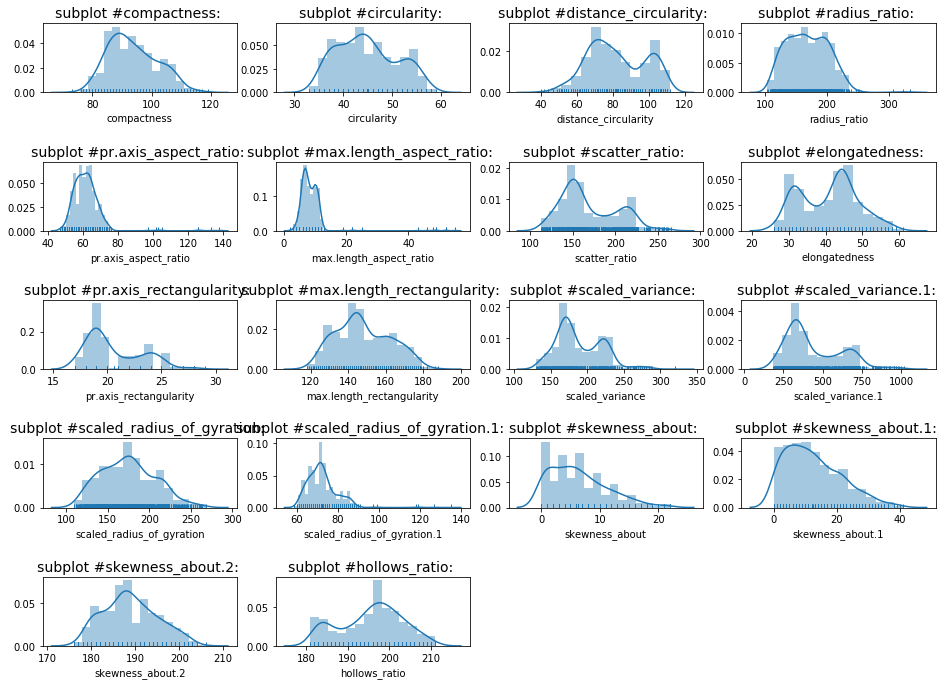

In [48]:
fig = plt.figure(figsize=(16,14))
fig.subplots_adjust(hspace=1)
#fig.tight_layout(h_pad=100.0, w_pad=100.0)
for i,cols in enumerate(veh.columns):
    if cols != 'class':
        fig.add_subplot(6,4,i+1)
        plt.title('subplot #{}: '.format(cols), fontsize=14)
        sns.distplot(veh[cols], kde=True, rug=True, norm_hist=True)

### Observations from Univariate ###

Generally speaking the data seems to be approximately normal. A lot of them have twin peaks
There are exceptions of course. pr.axis_aspect_ratio, max_length_aspect_ratio and skewness. 

# BiVariate Analysis #

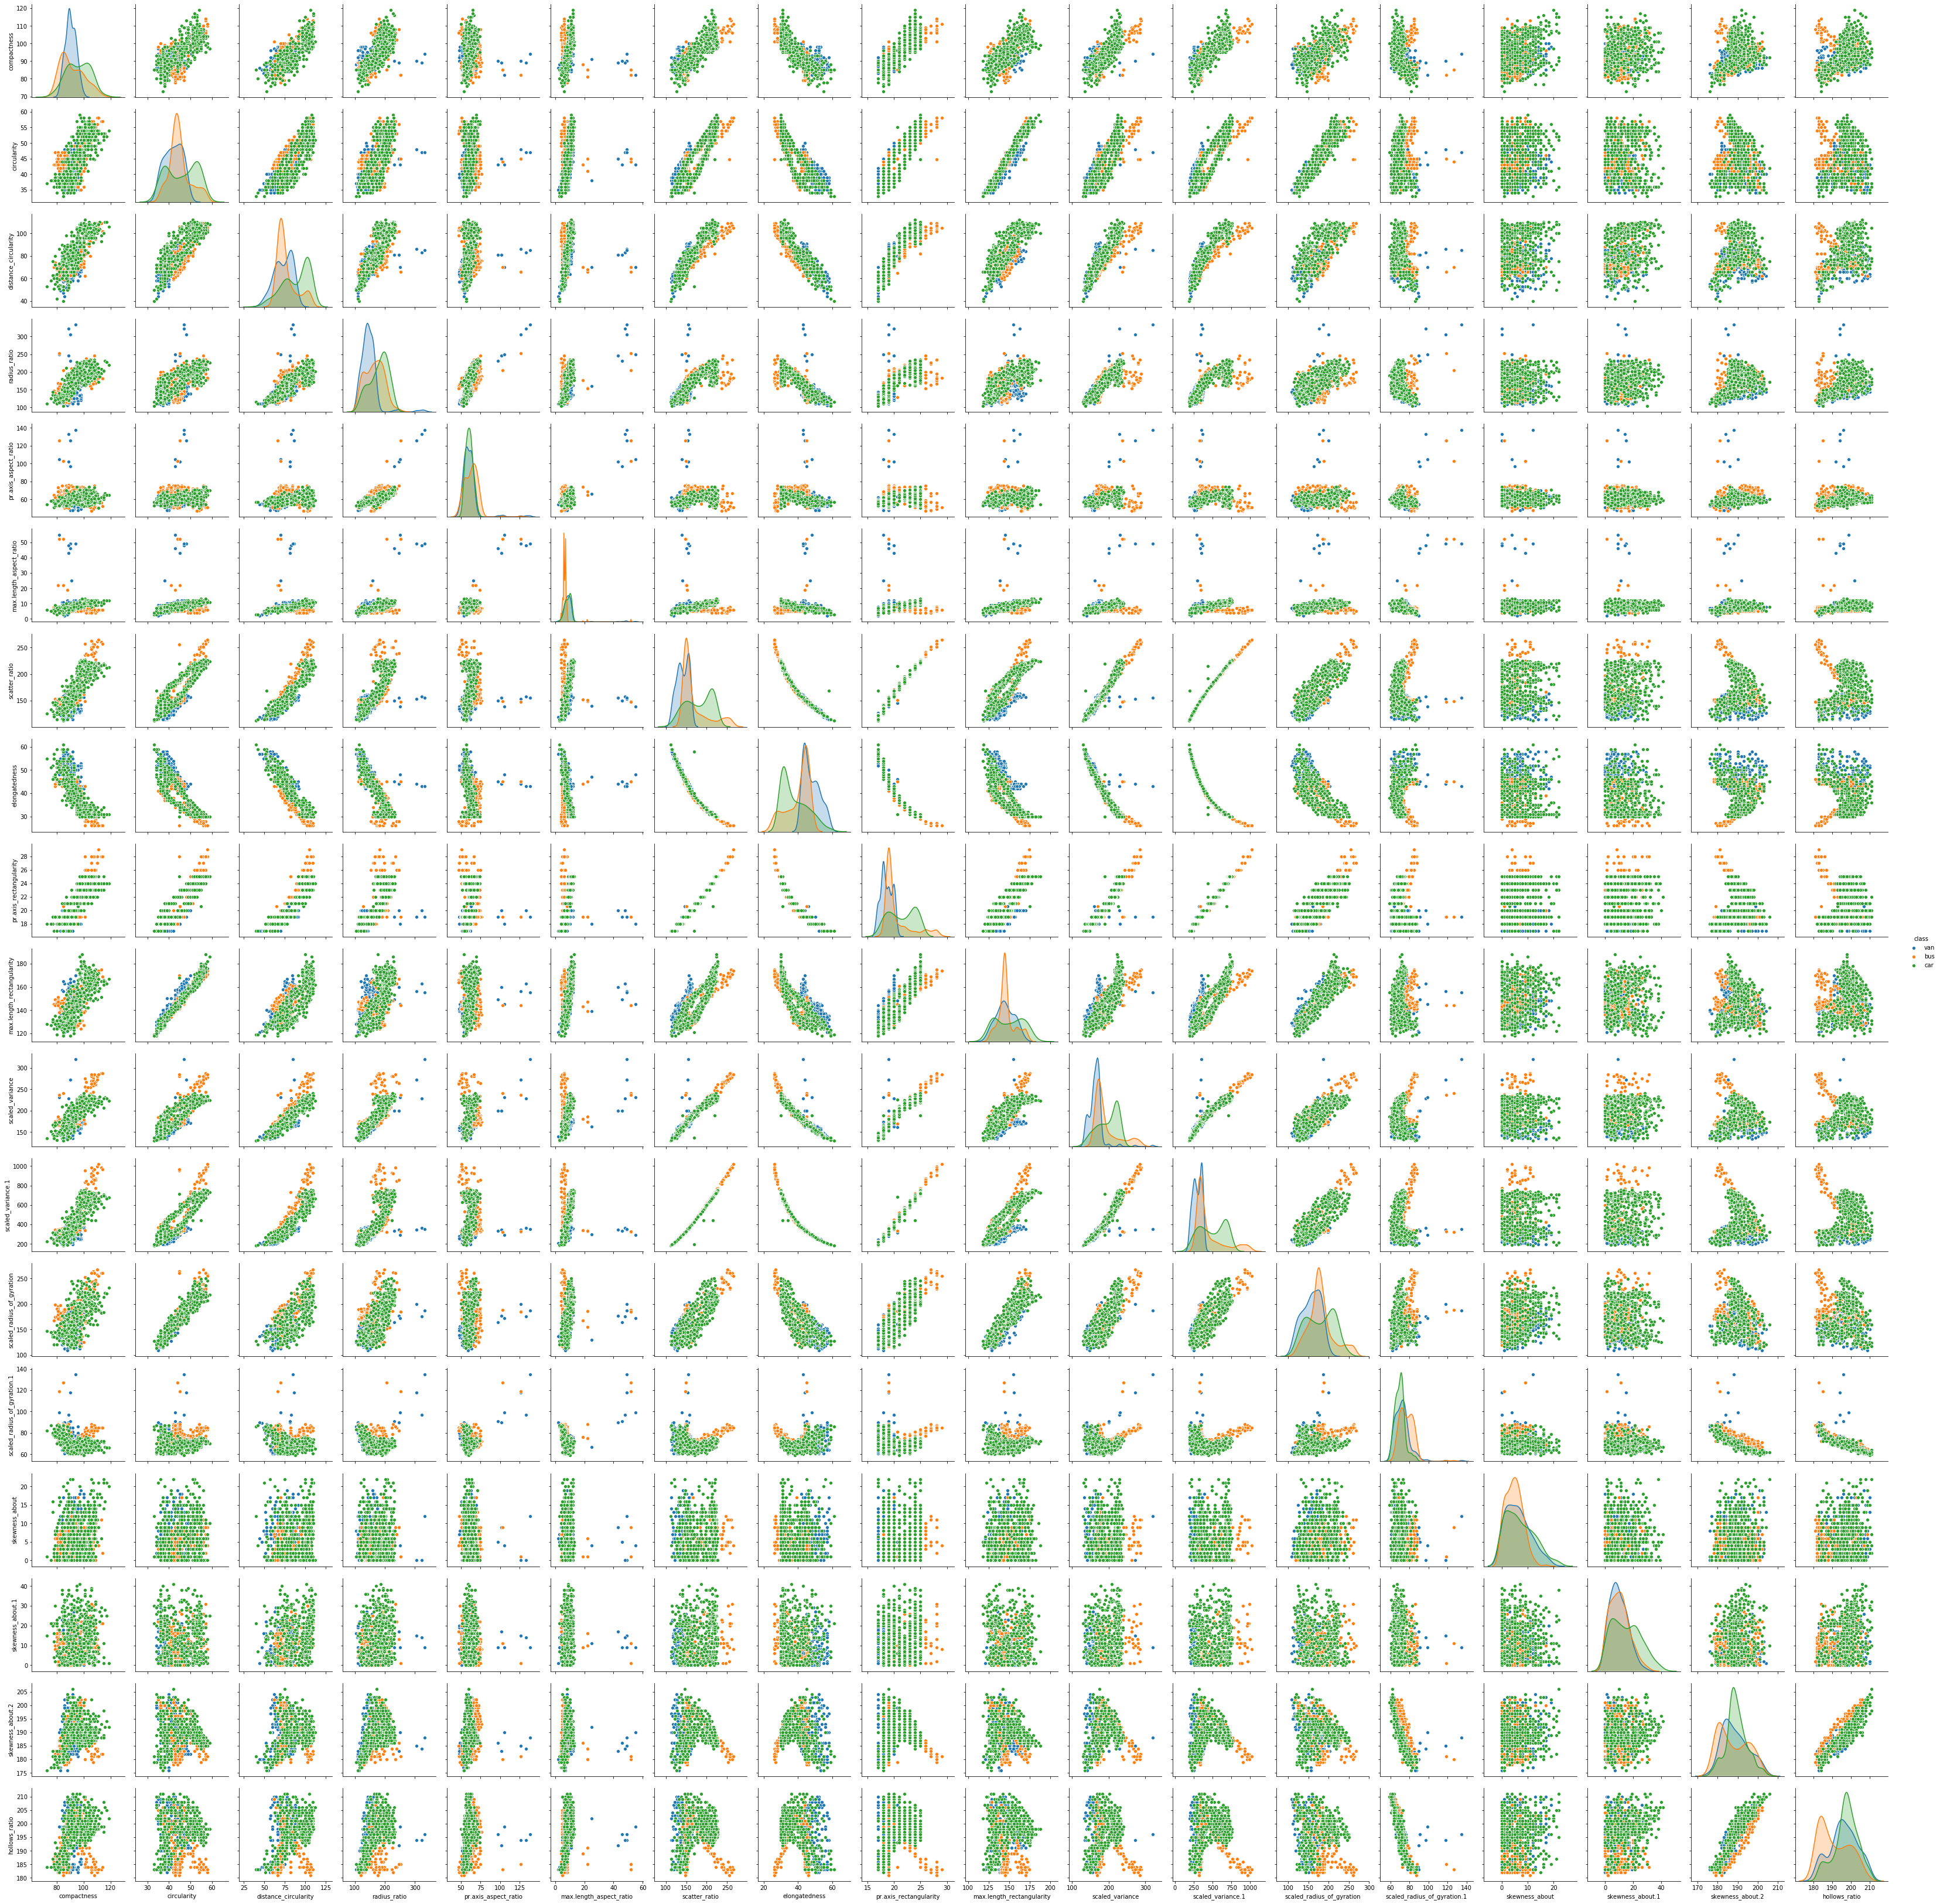

In [49]:
%matplotlib inline
sns.pairplot(veh, hue='class', hue_order=["van","bus","car"])

### Observation from bivariate analysis using raw data ###
There are several parameters prsent which have linear relationship. The graph is too complicated. Will make a decision based on correlation and multicolineatiry functions

In [50]:
X = veh.drop(['class'], axis=1)
#X.head()

<IPython.core.display.Javascript object>


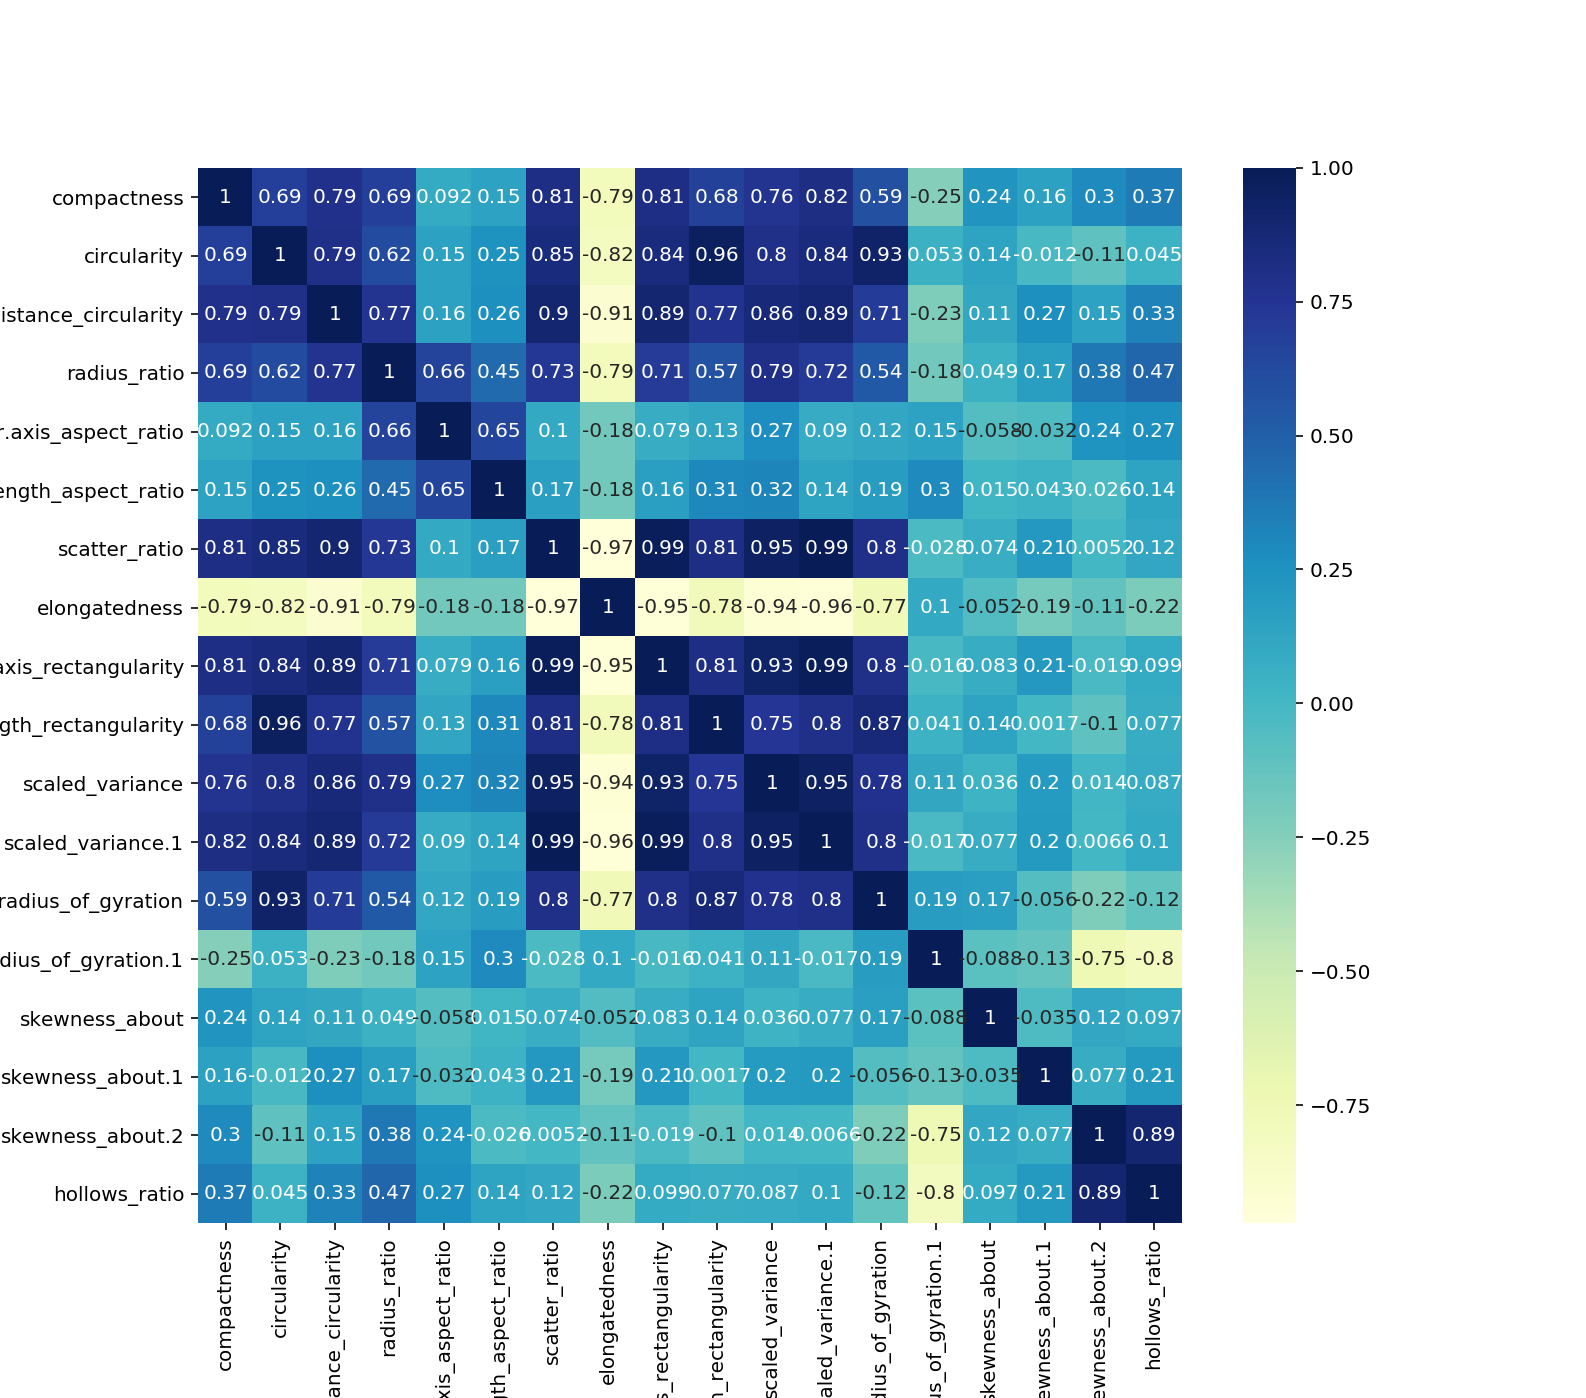

In [52]:
%matplotlib notebook
sns.heatmap(X.corr(),annot=True,cmap='YlGnBu')

### reading from coorelation ###
Strong coorelation of >0.9 between "scaled_vairance", "scaled_variance.1","scatter_ratio","pr.axis_rectangularity". Keep only scaled_variance

Strong coorelation of >0.9 between "circularity", "max.length_rectangularity", "scaled_radius_of_gyration". Keep only circularity

elongatedness has negative correlation with almost every variable. But strong <-0.9 with distance_circularity, scatter_ratio, pr.axis_rectangularity, scaled_variance, scaled_variance.1

# Multicollinearity analysis #

In [53]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [54]:
yum = calc_vif(X.apply(zscore))
yum.sort_values("VIF", axis = 0, ascending = True, 
                 inplace = True, na_position ='first') 
yum

variables         VIF
14               skewness_about    1.307225
15             skewness_about.1    1.566108
5       max.length_aspect_ratio    3.916625
0                   compactness    5.406320
13  scaled_radius_of_gyration.1   10.655046
12    scaled_radius_of_gyration   10.855713
16             skewness_about.2   12.341313
4          pr.axis_aspect_ratio   12.895442
2          distance_circularity   13.059321
17                hollows_ratio   15.534560
9     max.length_rectangularity   19.668634
3                  radius_ratio   31.151895
1                   circularity   31.527845
7                 elongatedness   36.976456
10              scaled_variance   37.270632
8        pr.axis_rectangularity   64.822631
11            scaled_variance.1  143.732551
6                 scatter_ratio  218.340933

### Reading from multicollinearity ###
Scatter_ratio, scaled_vairabce.1, pr.axis_rectangularity have high colinearity and can be dropped. It confirms our understanding from correlation matrix and pairplots.

circularity comes ranks high on VIF however others with high coorelation  "max.length_rectangularity", "scaled_radius_of_gyration" rank lower. 

We will review the decision above and keep scaled_radius_of_gyration and drop max.length_rectangularity and circularity


In [55]:
X=X.drop(["scaled_variance.1","scatter_ratio","pr.axis_rectangularity", "max.length_rectangularity", "circularity"], axis=1)

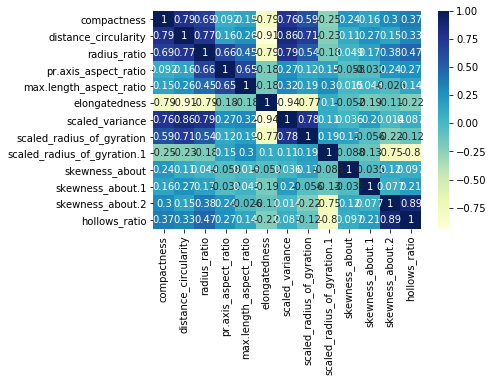

In [12]:
sns.heatmap(X.corr(),annot=True,cmap='YlGnBu')

In [56]:
yum = calc_vif(X.apply(zscore))
yum.sort_values("VIF", axis = 0, ascending = True, 
                 inplace = True, na_position ='first') 
yum

variables        VIF
9                skewness_about   1.284407
10             skewness_about.1   1.464465
4       max.length_aspect_ratio   3.352242
7     scaled_radius_of_gyration   4.317672
0                   compactness   4.364586
8   scaled_radius_of_gyration.1  10.582948
11             skewness_about.2  10.696993
3          pr.axis_aspect_ratio  12.014285
1          distance_circularity  12.768893
12                hollows_ratio  15.047131
5                 elongatedness  18.395279
6               scaled_variance  27.308724
2                  radius_ratio  28.644753

### Second reading of Correlation and multicolinearity ###
Scaled_variance and radius ratio can be considered for dropping. We will review it later

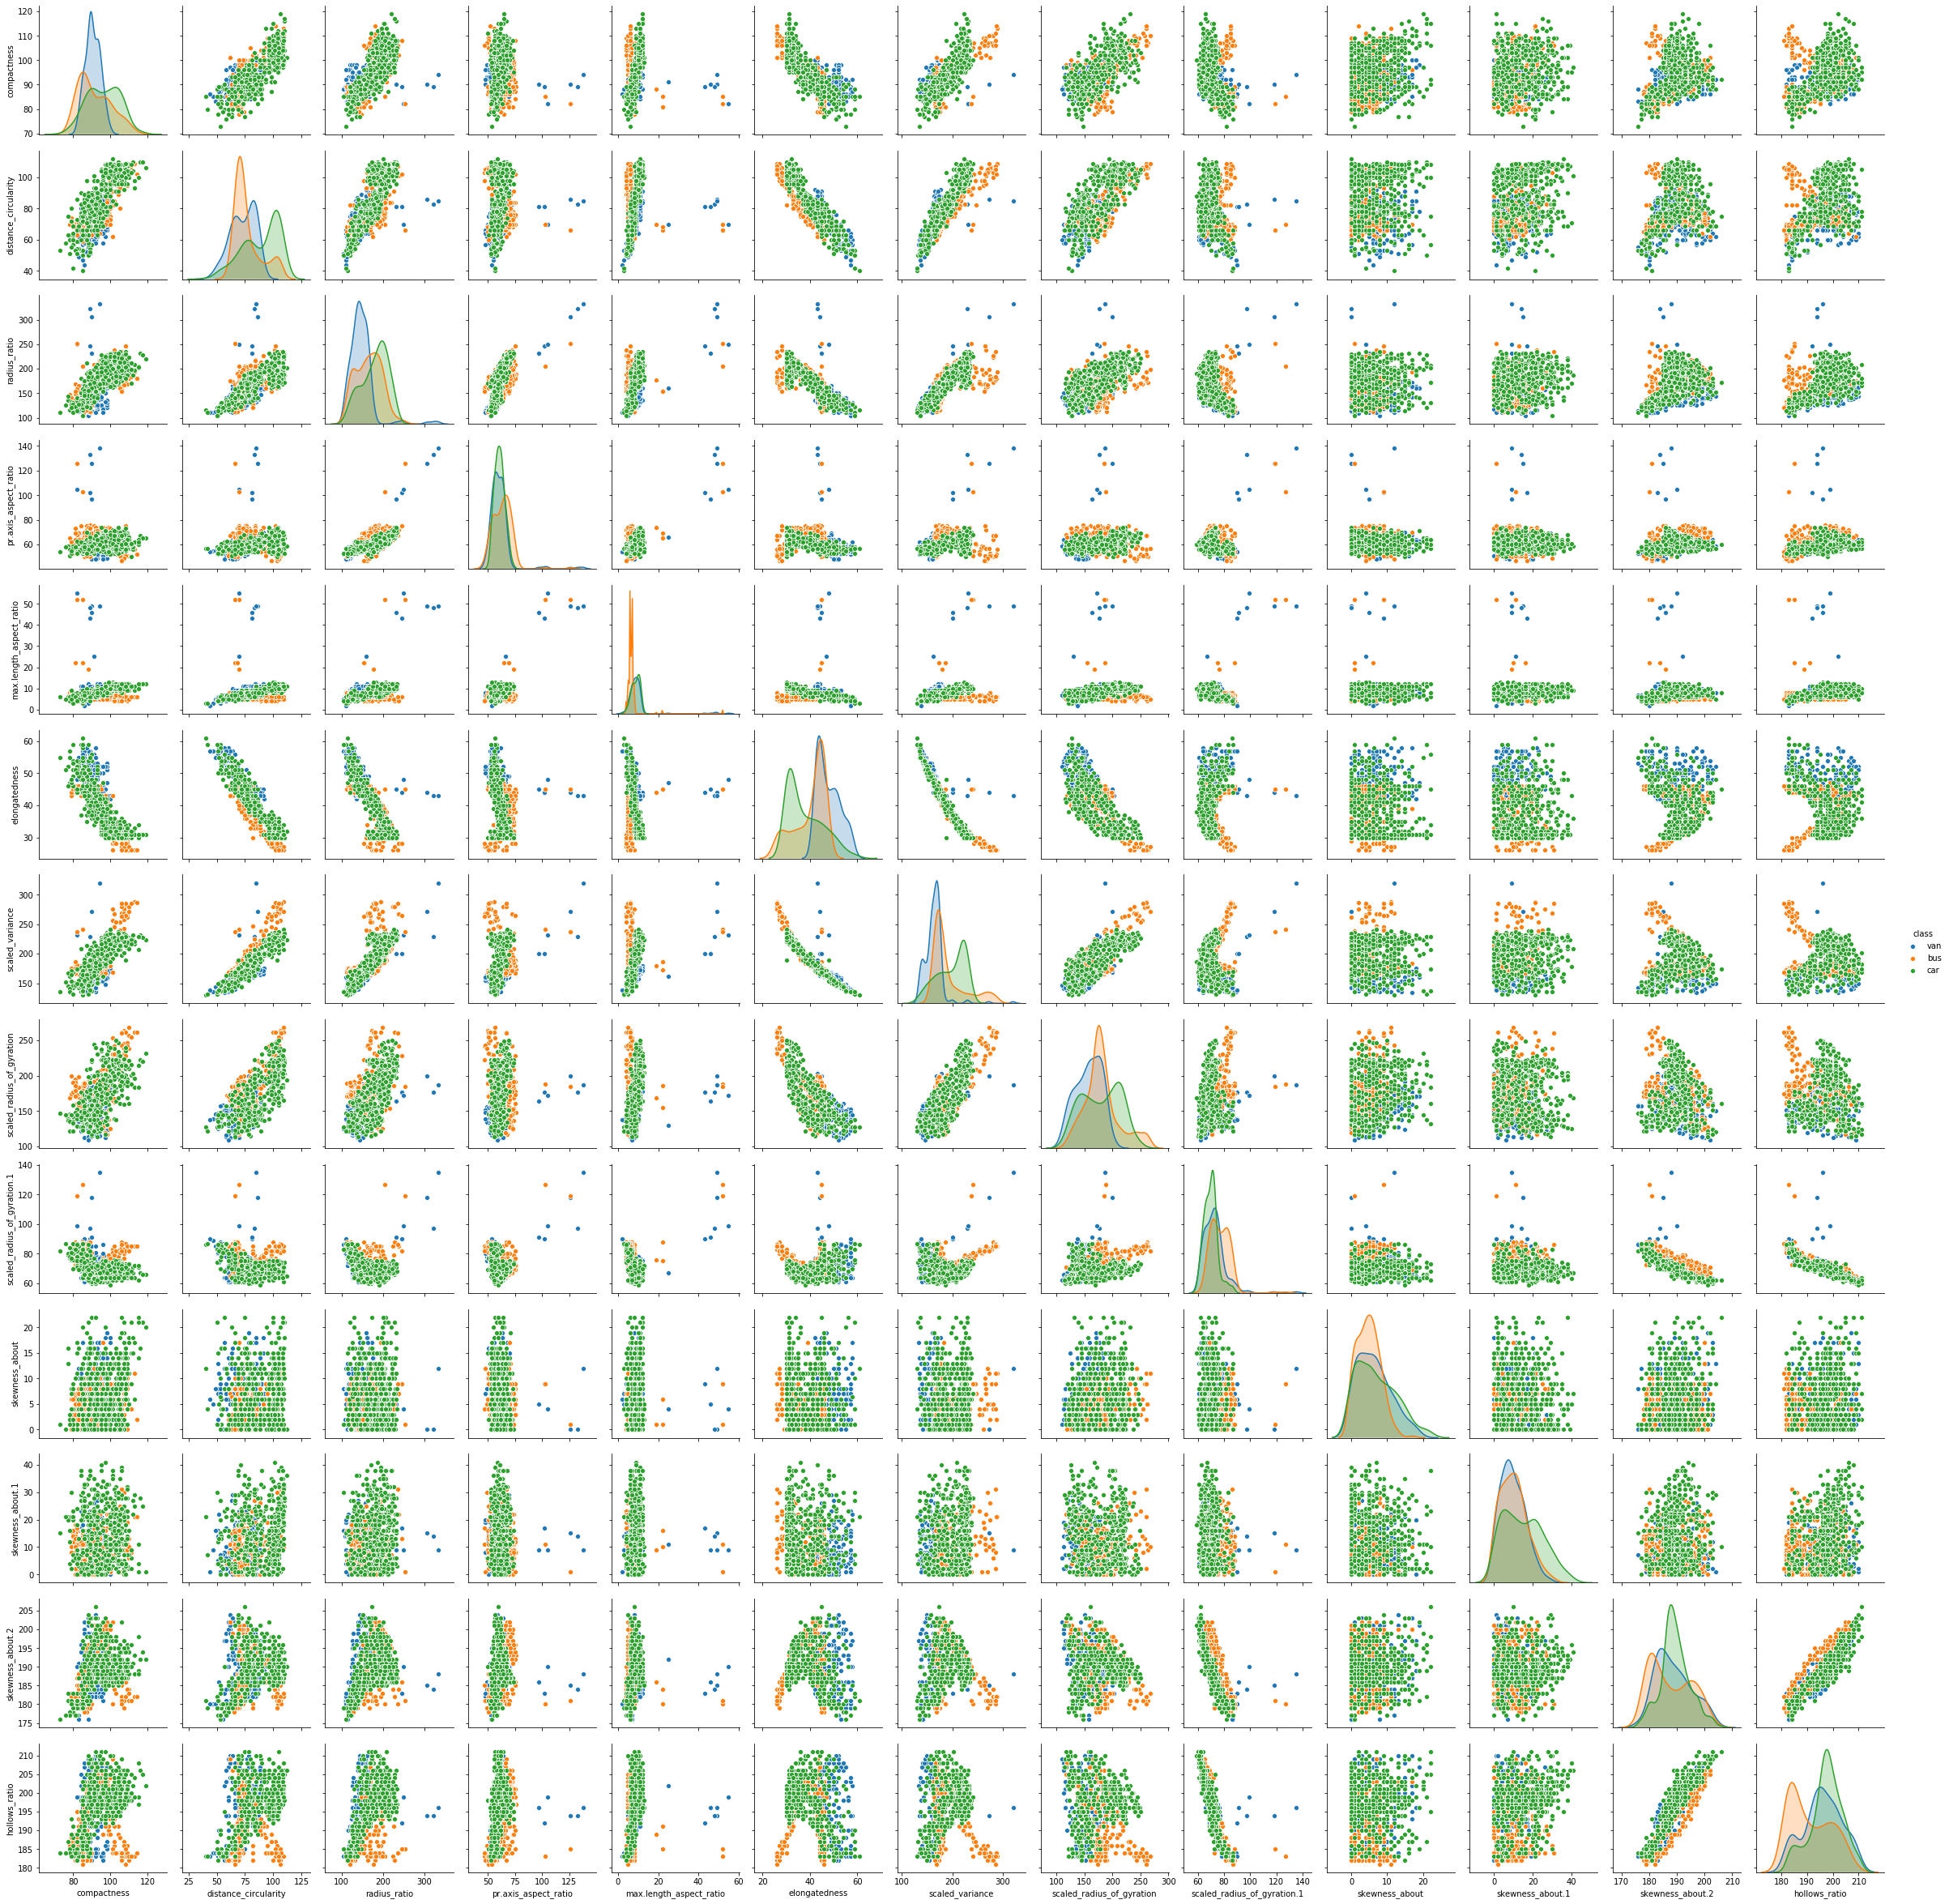

In [126]:
%matplotlib inline
sns.pairplot(veh.drop(["scaled_variance.1","scatter_ratio","pr.axis_rectangularity", "max.length_rectangularity", "circularity"], axis=1), hue='class', hue_order=["van","bus","car"])

# Test Trian split #

In [57]:
y = veh["class"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, stratify=y)
X.describe().transpose()

count        mean        std    min     25%  \
compactness                  846.0   93.678487   8.234474   73.0   87.00   
distance_circularity         846.0   82.110451  15.740902   40.0   70.00   
radius_ratio                 846.0  168.888095  33.400979  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.678910   7.882119   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376   4.601217    2.0    7.00   
elongatedness                846.0   40.933728   7.811559   26.0   33.00   
scaled_variance              846.0  188.631079  31.355195  130.0  167.00   
scaled_radius_of_gyration    846.0  174.709716  32.546223  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.447743   7.468450   59.0   67.00   
skewness_about               846.0    6.364286   4.903148    0.0    2.00   
skewness_about.1             846.0   12.602367   8.930792    0.0    5.00   
skewness_about.2             846.0  188.919527   6.152166  176.0  184.00   
hollows_ratio                846.0  195.632388   7.438797  181.0  190.25   

                               50%    75%    max  
compactness                   93.0  100.0  119.0  
distance_circularity          80.0   98.0  112.0  
radius_ratio                 168.0  195.0  333.0  
pr.axis_aspect_ratio          61.0   65.0  138.0  
max.length_aspect_ratio        8.0   10.0   55.0  
elongatedness                 43.0   46.0   61.0  
scaled_variance              179.0  217.0  320.0  
scaled_radius_of_gyration    174.0  198.0  268.0  
scaled_radius_of_gyration.1   72.0   75.0  135.0  
skewness_about                 6.0    9.0   22.0  
skewness_about.1              11.0   19.0   41.0  
skewness_about.2             188.0  193.0  206.0  
hollows_ratio                197.0  201.0  211.0

# Support vector machine with k-fold #

<IPython.core.display.Javascript object>


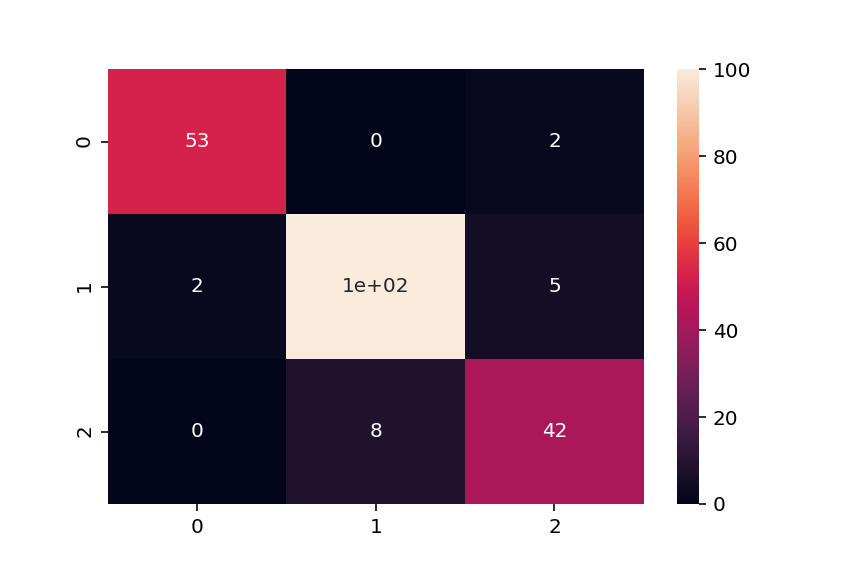

Accuracy score is  0.9198113207547169


In [81]:
svm = SVC()
svm.fit(X_train.apply(zscore),y_train)
svm_y = svm.predict(X_test.apply(zscore))
sns.heatmap(metrics.confusion_matrix(y_test,svm_y),annot=True)
print("Accuracy score is ", svm.score(X_test.apply(zscore),y_test))

In [89]:
kfold = KFold(n_splits=10, random_state=7) ## will be reused later

accuracy = cross_val_score(svm, X.apply(zscore), y, scoring='accuracy', cv = kfold) ## K = 10 fold accuracy score.
print("Accuracy score per fold: ", accuracy)
print("Average Accuracy score: ", accuracy.mean()*100, '%')

Accuracy score per fold:  [0.90588235 0.96470588 0.95294118 0.96470588 0.96470588 0.97647059
 0.97619048 0.95238095 0.94047619 0.94047619]
Average Accuracy score:  95.3893557422969 %


/Users/anandram.b/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Reading from SVM And K-fold ###
- SVM without scaling gets an accuracy of 68%. with zscore scalling gets a accuracy of 91.98%
- SVM with kfold without scaling gets an accurancy of 70% on an average. With zscore scalling gets a accuracy 94.91%

# PCA #

In [82]:
pca = PCA()
pca.fit(X.apply(zscore))
print("The Eigen Values are: \n", pca.explained_variance_)
print("\n\nThe eigen vectors are:\n", pca.components_)

The Eigen Values are: 
 [5.31451034 2.77462469 1.75891033 1.09846999 0.9020978  0.40499054
 0.29466231 0.16925334 0.14977017 0.05672407 0.0433391  0.0294535
 0.01857845]


The eigen vectors are:
 [[ 3.69321926e-01  4.00626819e-01  4.00151245e-01  1.74511634e-01
   1.65032671e-01 -4.00004838e-01  3.91570553e-01  3.04215614e-01
  -9.21940442e-02  6.25479373e-02  9.96719953e-02  1.39156688e-01
   1.94161712e-01]
 [-2.70630897e-02  4.73068276e-02 -3.69905010e-02  1.49684314e-04
   1.28202070e-01 -1.11559265e-01  2.05120661e-01  3.07216212e-01
   5.27282266e-01 -5.10334453e-02 -9.01839585e-02 -5.28910129e-01
  -5.11677374e-01]
 [-2.07614087e-01 -1.59230365e-01  2.12976908e-01  6.42207608e-01
   5.61482639e-01  1.68232607e-01 -6.67448930e-02 -1.72191734e-01
   2.10831312e-01 -1.58872338e-01 -8.00689035e-02  9.04750499e-02
   1.08606830e-01]
 [ 9.71342938e-02 -8.16308632e-02 -1.44220437e-02  6.92861214e-02
   4.58070036e-02  7.29503119e-02 -8.40508670e-02  1.77150515e-01
  -5.12971867e-04  6.

In [83]:
print("The explained variance by each vector is: \n", pca.explained_variance_ratio_*100)

The explained variance by each vector is: 
 [40.83252629 21.31803839 13.51408642  8.43978127  6.93101146  3.11162942
  2.26395392  1.30040979  1.15071643  0.43582322  0.33298361  0.22629756
  0.14274222]


<IPython.core.display.Javascript object>


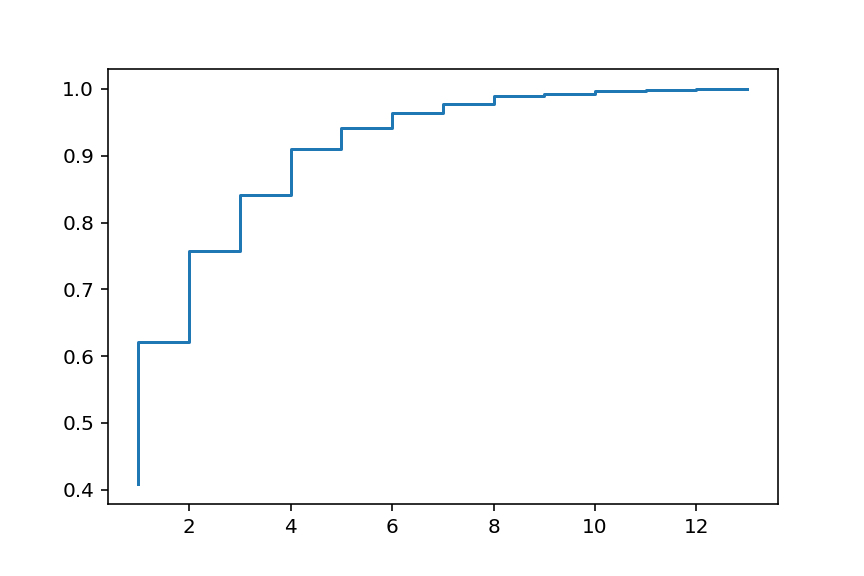

In [84]:
plt.step(range(1,14),np.cumsum(pca.explained_variance_ratio_))

### Reading from first run of PCA with all eigen vectors ###
Without scaling -The top 4 eigen vectors explains about 73+15+4.3+3.4+1.6 = 96.3% of variation. We can drop others. We run PCA again with n as 5

With scaling - The top 7 eigen vectors explains about 41+21+14+8+7+3+2 = 96+% of variation.We will run PCA again with n as 7.


# Rerun PCA (n_components as 7) and redo SVM with k-fold #

In [80]:
pca = PCA(n_components=7)
pca.fit(X.apply(zscore))
print("The Eigen Values are: \n", pca.explained_variance_)
print("\n\nThe eigen vectors are:\n", pca.components_)

The Eigen Values are: 
 [5.31451034 2.77462469 1.75891033 1.09846999 0.9020978  0.40499054
 0.29466231]


The eigen vectors are:
 [[ 3.69321926e-01  4.00626819e-01  4.00151245e-01  1.74511634e-01
   1.65032671e-01 -4.00004838e-01  3.91570553e-01  3.04215614e-01
  -9.21940442e-02  6.25479373e-02  9.96719953e-02  1.39156688e-01
   1.94161712e-01]
 [-2.70630897e-02  4.73068276e-02 -3.69905010e-02  1.49684314e-04
   1.28202070e-01 -1.11559265e-01  2.05120661e-01  3.07216212e-01
   5.27282266e-01 -5.10334453e-02 -9.01839585e-02 -5.28910129e-01
  -5.11677374e-01]
 [-2.07614087e-01 -1.59230365e-01  2.12976908e-01  6.42207608e-01
   5.61482639e-01  1.68232607e-01 -6.67448930e-02 -1.72191734e-01
   2.10831312e-01 -1.58872338e-01 -8.00689035e-02  9.04750499e-02
   1.08606830e-01]
 [ 9.71342938e-02 -8.16308632e-02 -1.44220437e-02  6.92861214e-02
   4.58070036e-02  7.29503119e-02 -8.40508670e-02  1.77150515e-01
  -5.12971867e-04  6.91758229e-01 -6.67066116e-01  9.74873727e-02
   3.89684250e-03]
 [

In [28]:
## X after transformation  with PCA
Xpca = pca.transform(X.apply(zscore))

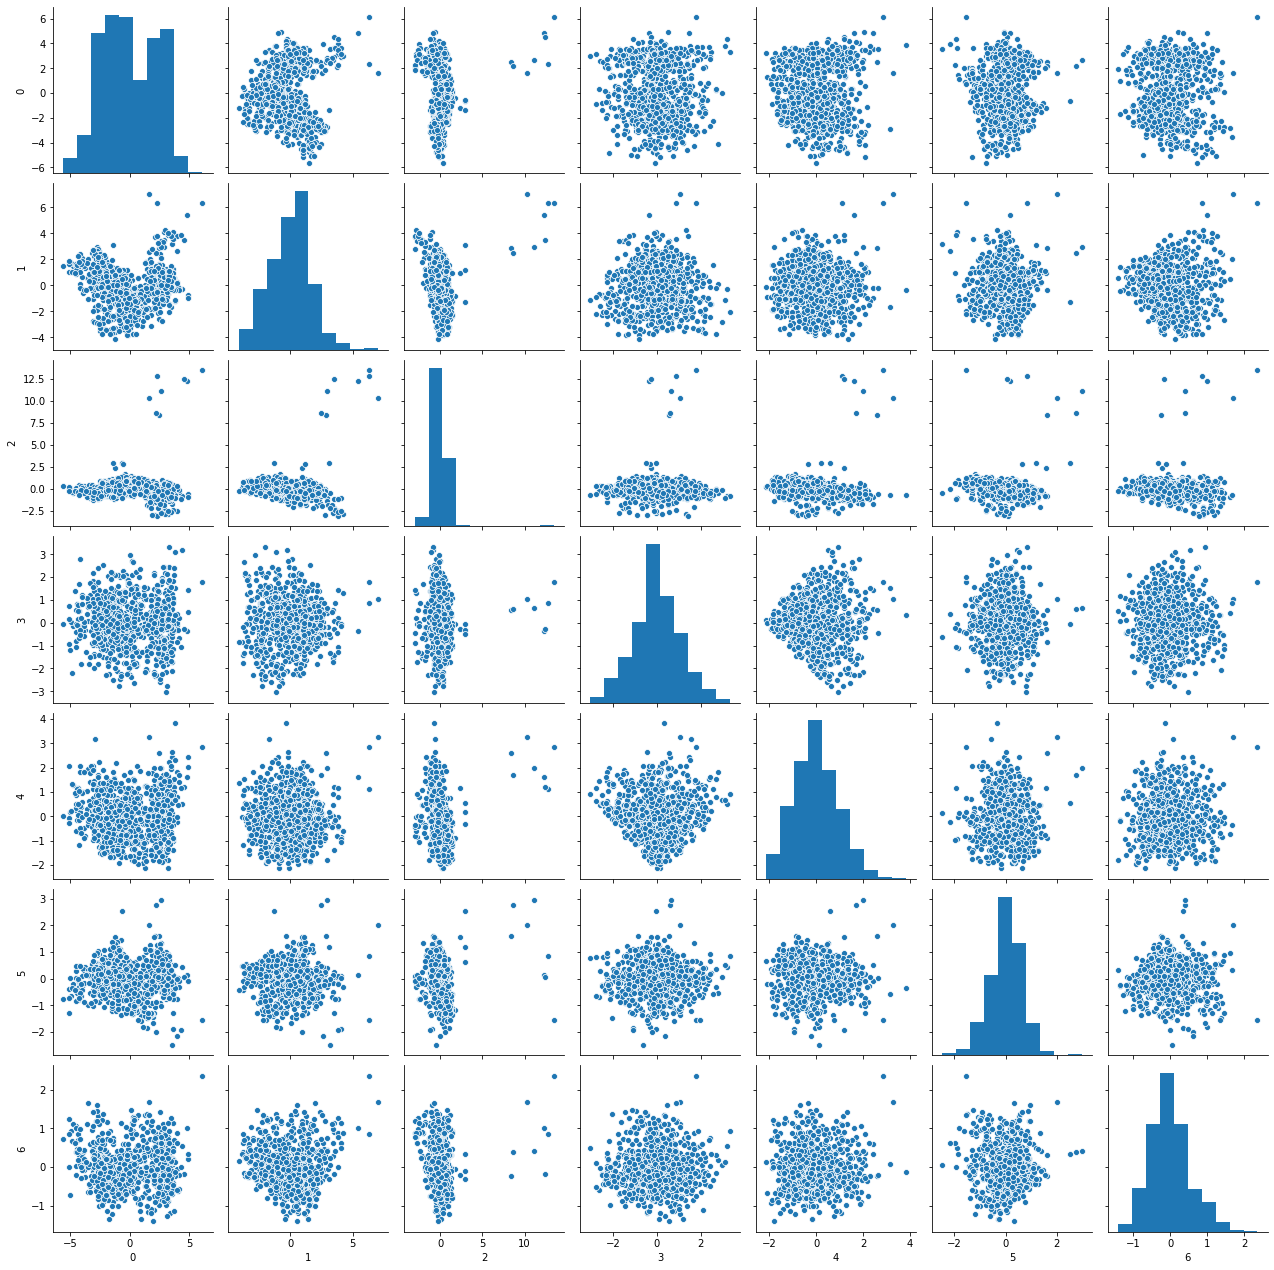

In [30]:
sns.pairplot(pd.DataFrame(Xpca))

### Observations from bivariate after PCA ###
No obvious colinearity present.

# Run SVM again #

In [90]:
X_train, X_test, y_train, y_test = train_test_split(Xpca, y, random_state=7, stratify=y)
svm = SVC()
svm.fit(X_train,y_train)
svm_y = svm.predict(X_test)
print("Accuracy Score is ", svm.score(X_test, y_test))
accuracy = cross_val_score(svm, Xpca, y, scoring='accuracy', cv = kfold)
print("Accuracy score per fold is ", accuracy)
print("Mean Accuracy score with k-fold ", accuracy.mean())

Accuracy Score is  0.8773584905660378
Accuracy score per fold is  [0.90588235 0.92941176 0.94117647 0.92941176 0.90588235 0.92941176
 0.9047619  0.86904762 0.94047619 0.88095238]
Mean Accuracy score with k-fold  0.913641456582633


# FINAL  Observations from SVM with PCA #
With PCA the accuracy score has reduced by approximately 4%. However it has reduced the dimentions of data and makes SVM less resource hungy.

| Algo | Accuracy without PCA | Accuracy with PCA|
| --- | --- | --- |
| SVM | 91.98% | 87.73% |
| SVM with k-fold | 95.38% | 91.36% |


